In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [12]:
df = pd.read_csv('D:/DataHub/Bengaluru_House_Data.csv')

df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [13]:
# info of the dataframe
df.info()

# shape of dataframe
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


(13320, 9)

In [14]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [15]:
#checking the null values
null_values = df.isnull().sum()

null_values[null_values > 0]

location       1
size          16
society     5502
bath          73
balcony      609
dtype: int64

In [16]:
# checking count, mean, standard deviation, minimum, and maximum values for each numerical column
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [17]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

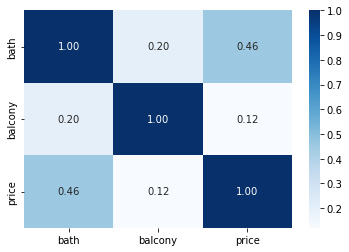

In [18]:
#correlation b/w the columns
matrix = df.corr()
sns.heatmap(matrix, annot=True, cmap='Blues',fmt= '.2f')
plt.show()

In [19]:
cols = ['area_type', 'availability', 'society','balcony']

ndf = df.drop(columns=cols)

ndf.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [20]:
ndf.shape

(13320, 5)

In [21]:
ndf.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
#null values percentage
missing_values = ndf.isnull().sum()
missing_values[missing_values > 0]

missing_percentage = (missing_values / len(ndf))*100

missing_percentage

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [23]:
#Handling null  values
ndf = ndf.dropna()

#checking null values after removing 
ndf.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
ndf['bhk'] = ndf['size'].apply(lambda i : i.split(' ')[0])

ndf = ndf.drop(columns='size')

ndf.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [25]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  object 
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [26]:
#changing the dtype of bhk columns
ndf['bhk'] = ndf['bhk'].astype(int)

# ndf['bhk'] = ndf['bhk'].round(2).astype(float)

In [27]:
ndf['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [28]:
ndf[ndf.bhk>10]

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [29]:
# This function takes col (total_sqft) and takes the float average of the range data points.

def convert_sqft_to_num(col):
    try:
        # Check if the value is a range (e.g., '1200-1500')
        flag = col.split('-')
        if len(flag) == 2:
            return (float(flag[0]) + float(flag[1])) / 2
        
        # Otherwise, try to convert the value directly to a float
        return float(col)
    except ValueError:
        # Handle non-numeric values, return NaN or handle them as needed
        return np.nan

# Apply the function to the 'total_sqft' column
ndf['total_sqft'] = ndf['total_sqft'].apply(convert_sqft_to_num)


In [30]:
ndf.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [31]:
missing_values[missing_values > 0]
missing_percentage = (missing_values / len(ndf))*100

missing_percentage

location      0.007549
size          0.120791
total_sqft    0.000000
bath          0.551110
price         0.000000
dtype: float64

In [32]:
ndf = ndf.dropna()

In [33]:
# Number of houses in each location.
ndf.location = ndf.location.apply(lambda x: x.strip())

location_stats = ndf.groupby('location')['location'].agg('count').sort_values(ascending= False)

location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [34]:
# Number of locations that have <= 10 houses in the dataset
sparse_locations = location_stats[location_stats <= 10]
print(f"Number of locations with 10 or fewer houses: {len(sparse_locations)}")

Number of locations with 10 or fewer houses: 1047


In [35]:
# Identify locations with more than 10 houses
locations_to_keep = location_stats[location_stats > 10].index

# Filter the DataFrame to keep only these locations
ndf = ndf[ndf['location'].isin(locations_to_keep)]

# Check the number of remaining locations
len(ndf['location'].unique())

240

In [36]:
ndf.shape

(10328, 5)

In [37]:
# Calculate the square feet per BHK
ndf.loc[:, 'sqft_per_bhk'] = ndf['total_sqft'] / ndf['bhk']

threshold = 300

# Filter out anomalies
ndf = ndf[ndf['sqft_per_bhk'] >= threshold]

ndf.head(10)

,location,total_sqft,bath,price,bhk,sqft_per_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2,528.000000
1,Chikka Tirupathi,2600.0,5.0,120.00,4,650.000000
2,Uttarahalli,1440.0,2.0,62.00,3,480.000000
3,Lingadheeranahalli,1521.0,3.0,95.00,3,507.000000
4,Kothanur,1200.0,2.0,51.00,2,600.000000
5,Whitefield,1170.0,2.0,38.00,2,585.000000
6,Old Airport Road,2732.0,4.0,204.00,4,683.000000
7,Rajaji Nagar,3300.0,4.0,600.00,4,825.000000
8,Marathahalli,1310.0,3.0,63.25,3,436.666667
10,Whitefield,1800.0,2.0,70.00,3,600.000000


In [38]:
ndf.describe()

,total_sqft,bath,price,bhk,sqft_per_bhk
count,9899.000000,9899.000000,9899.000000,9899.000000,9899.000000
mean,1545.418770,2.524396,101.646456,2.609759,589.780126
std,1002.532196,1.009995,116.540942,0.902809,348.086384
min,300.000000,1.000000,9.000000,1.000000,300.000000
25%,1115.000000,2.000000,48.000000,2.000000,496.666667
50%,1296.000000,2.000000,68.000000,2.000000,564.000000
75%,1684.500000,3.000000,110.000000,3.000000,628.333333
max,36000.000000,12.000000,2250.000000,10.000000,26136.000000


In [39]:
ndf['price_per_sqft'] = ndf['price']*100000/ndf['total_sqft'] # I multiply the price by 100000; 1 lakh = 100000
ndf.head(10)

,location,total_sqft,bath,price,bhk,sqft_per_bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,528.000000,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,650.000000,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,480.000000,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,507.000000,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,600.000000,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,585.000000,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,683.000000,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,825.000000,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,436.666667,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,600.000000,3888.888889


In [40]:
ndf.describe()

,total_sqft,bath,price,bhk,sqft_per_bhk,price_per_sqft
count,9899.000000,9899.000000,9899.000000,9899.000000,9899.000000,9899.000000
mean,1545.418770,2.524396,101.646456,2.609759,589.780126,6006.427915
std,1002.532196,1.009995,116.540942,0.902809,348.086384,3286.326418
min,300.000000,1.000000,9.000000,1.000000,300.000000,371.428571
25%,1115.000000,2.000000,48.000000,2.000000,496.666667,4191.869919
50%,1296.000000,2.000000,68.000000,2.000000,564.000000,5250.172771
75%,1684.500000,3.000000,110.000000,3.000000,628.333333,6718.856921
max,36000.000000,12.000000,2250.000000,10.000000,26136.000000,76530.612245


In [41]:

def remove_outliners(df):
    df_out = pd.DataFrame()
    for i, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-sd))  & (sub_df.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
        
        
        

In [42]:
Q1 = ndf['price_per_sqft'].quantile(0.25)
Q3 = ndf['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering outliers
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = ndf[(ndf['price_per_sqft'] >= lower_bound) & (ndf['price_per_sqft'] <= upper_bound)]

df_filtered.shape

(8163, 7)

In [43]:
df_filtered.describe()

,total_sqft,bath,price,bhk,sqft_per_bhk,price_per_sqft
count,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000
mean,1437.979422,2.409041,76.301058,2.515252,571.228578,5161.714600
std,663.927906,0.882680,46.096275,0.808165,141.794967,1244.595561
min,300.000000,1.000000,10.000000,1.000000,300.000000,2929.687500
25%,1101.000000,2.000000,48.000000,2.000000,500.000000,4168.924303
50%,1260.000000,2.000000,65.000000,2.000000,560.000000,5002.779322
75%,1590.000000,3.000000,90.000000,3.000000,618.666667,6066.700371
max,11890.000000,12.000000,700.000000,10.000000,4420.000000,7970.570202


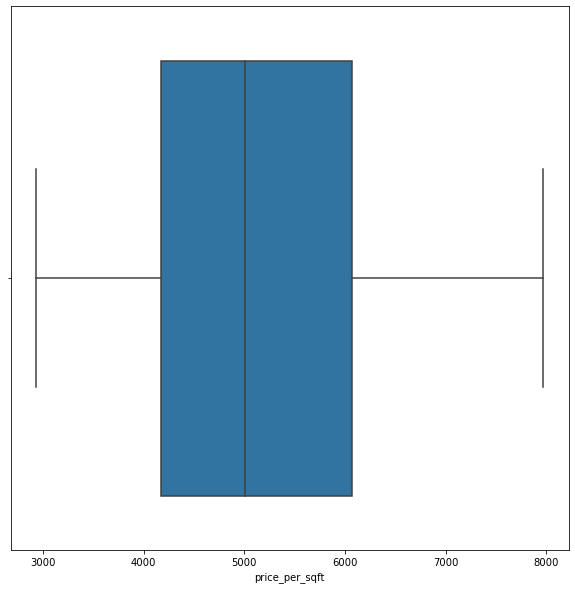

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_filtered, x = df_filtered['price_per_sqft'])
plt.show()

In [45]:
# how the prices of 2 bhk , 3 bhk and 4bhk vary in the same location

def scratter_plot(dataframe, loc):
    df_2bkh = dataframe[(dataframe.location==loc) & (dataframe.bhk==2)]
    df_3bkh = dataframe[(dataframe.location==loc) & (dataframe.bhk==3)]
    df_4bkh = dataframe[(dataframe.location==loc) & (dataframe.bhk==4)]
    
    plt.figure(figsize=(12, 8))
    # Scatter plot for 2 BHK
    plt.scatter(df_2bkh.total_sqft, df_2bkh.price ,color='blue', marker='o', label='2 BHK')
    
    # Scatter plot for 3 BHK
    plt.scatter(df_3bkh.total_sqft, df_3bkh.price, color='green', marker='x', label='3 BHK')
    
    # Scatter plot for 4 BHK
    plt.scatter(df_4bkh.total_sqft, df_4bkh.price,color='red', marker='^', label='4 BHK')
    
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per square feet')
    plt.title(f'Price comparison of houses in {loc} with 2 or 3 or 4 bedrooms')
    
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

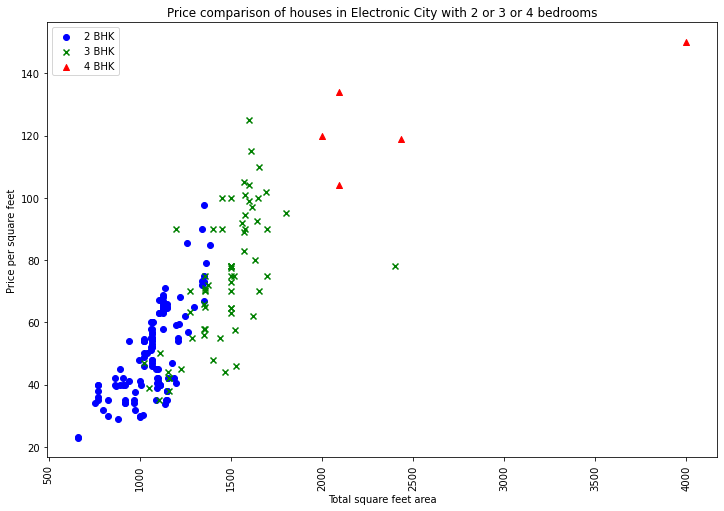

In [46]:
scratter_plot(df_filtered, 'Electronic City')

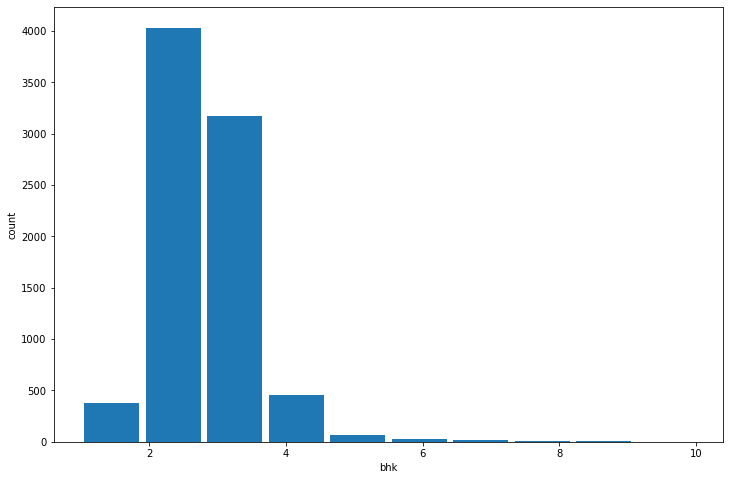

In [47]:
plt.figure(figsize=(12, 8))
plt.hist(data=df_filtered, x = 'bhk', rwidth = 0.9)
plt.xlabel('bhk')
plt.ylabel('count')
plt.show()

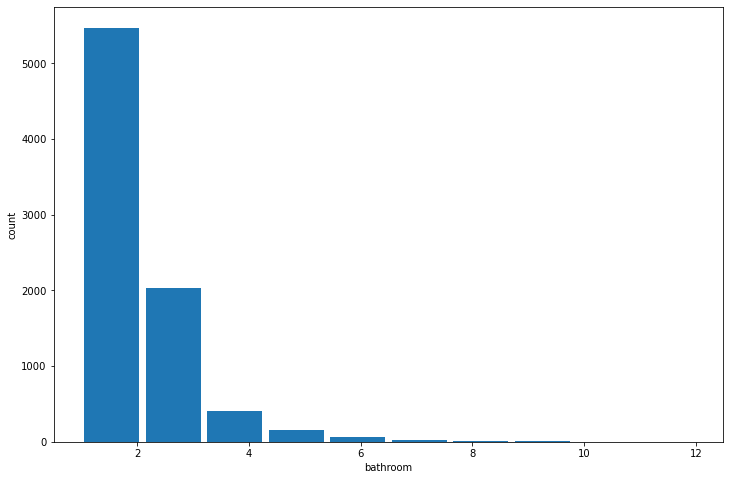

In [48]:
plt.figure(figsize=(12, 8))
plt.hist(data=df_filtered, x = 'bath', rwidth = 0.9)
plt.xlabel('bathroom')
plt.ylabel('count')
plt.show()

In [49]:
df_filtered[(df_filtered.bath) > (df_filtered.bhk + 1)]

,location,total_sqft,bath,price,bhk,sqft_per_bhk,price_per_sqft
84,EPIP Zone,1499.00,5.0,102.0,3,499.666667,6804.536358
337,Thigalarapalya,3122.00,6.0,230.0,4,780.500000,7367.072389
490,Old Madras Road,4500.00,7.0,337.0,5,900.000000,7488.888889
550,Hebbal,3450.00,5.0,260.0,3,1150.000000,7536.231884
1330,Jakkur,3467.86,6.0,249.0,4,866.965000,7180.220655
1574,Singasandra,3850.00,6.0,195.0,4,962.500000,5064.935065
1614,Sarjapur Road,3430.00,6.0,228.5,4,857.500000,6661.807580
1683,Old Madras Road,3715.00,6.0,224.5,4,928.750000,6043.068641
1838,Old Madras Road,3630.00,6.0,195.0,4,907.500000,5371.900826
1948,Kanakpura Road,3500.00,6.0,225.0,4,875.000000,6428.571429


In [50]:
#dataframe where the number of the bathroom is not more than bhk
df_filtered = df_filtered[(df_filtered.bath) < (df_filtered.bhk + 1)]

In [51]:
df_filtered.shape

(7804, 7)

In [52]:
#used the price_per_sqft column to do alot of outlier filtering , droping
#it as it won't be an important feature for training the regression model.
cols2 = ['price_per_sqft']
df_filtered = df_filtered.drop(columns=cols2, axis=1)
df_filtered.head()

,location,total_sqft,bath,price,bhk,sqft_per_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2,528.0
2,Uttarahalli,1440.0,2.0,62.00,3,480.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,507.0
4,Kothanur,1200.0,2.0,51.00,2,600.0
5,Whitefield,1170.0,2.0,38.00,2,585.0


In [53]:
# One-hot encode the 'location' column

df_encoaded = pd.get_dummies(df_filtered['location'], drop_first=True)



In [54]:
# Concatenate the dummies dataframe with the main dataframe
df_combined = pd.concat([df_filtered, df_encoaded], axis=1)

df_combined = df_combined.drop('location', axis=1)

df_combined.head()

,total_sqft,bath,price,bhk,sqft_per_bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,528.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,507.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,585.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
x = df_combined.drop('price', axis=1)
y = df_combined['price']

In [56]:
#shape of training & test set 
print(x.shape)
print(y.shape)

(7804, 242)
(7804,)


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2, random_state=10)

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [59]:
ypred = lin_reg.predict(xtest)

In [60]:
accuracy = (lin_reg.score(xtest.values, ytest.values))*100

print(f'Accuracy of the model: {(accuracy):.2f}%')

Accuracy of the model: 84.52%


In [61]:
from sklearn.metrics import r2_score

# Assuming ytest contains the actual values and ypred contains the predicted values
r_squared = r2_score(ytest, ypred)

print("R-squared:", r_squared)


R-squared: 0.8452319438394144


In [62]:
# Function to find the best model using grid search
def find_best_model_using_gridSearchCV(x,y):
    # Define models and parameters for grid search
    algos = {
        'liner regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        },
        'random forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7]
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algos_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model': algos_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])

In [63]:
# Execute the function
best_model_results = find_best_model_using_gridSearchCV(x, y)
best_model_results

,model,best_score,best_params
0,liner regression,0.816728,{'normalize': False}
1,lasso,0.781101,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.761234,"{'criterion': 'mse', 'splitter': 'best'}"
3,random forest,0.838447,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
4,xgboost,0.834642,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."


In [66]:
best_model = RandomForestRegressor(max_depth = None, max_features='sqrt',min_samples_split=2, n_estimators=100, random_state=42)
best_model.fit(xtrain, ytrain)  # Train the model

RandomForestRegressor(max_features='sqrt', random_state=42)

In [67]:
def predictPrice(location, sqft, bhk):
    loc_index = np.where(x.columns==location)[0][0]  # Get index of the location passed
    
    i = np.zeros(len(x.columns)) # Create an array of zeros
    i[0] = sqft
    i[1] = bhk
    
    if loc_index > 0:
        i[loc_index] = 1 # assign 1 wherever the location should be in the array.
    return best_model.predict([i])[0] 

In [69]:
price = predictPrice('Indira Nagar', 1000, 2)
print(f"Price: {price:.2f}Lakh")

Price: 43.85Lakh


In [71]:
price = predictPrice('Indira Nagar', 1000, 3)
print(f"Price: {price:.2f}Lakh")

Price: 57.30Lakh


In [74]:
price = predictPrice('Indira Nagar', 2225, 3)
print(f"Price: {price:.2f}Lakh")

Price: 110.78Lakh
